In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 500)

In [27]:
filename = 'cleaned_fraudTrain.csv'

# import Dataset
path = '../dataset/midterm_dataset/'+filename
df = pd.read_csv(path)

row_num = df.shape[0]
feature_num = df.shape[1]

print(df.shape)
df

(1296675, 14)


,category,amt,is_male,lat,long,city_pop,job,unix_time,is_fraud,state_city,age,trans_time,trans_year,trans_month
0,misc_net,4.97,0,36.0788,-81.1781,3495,"Psychologist, counselling",1325376018,0,"28654, Moravian Falls, NC",31,Late Night,2019,1
1,grocery_pos,107.23,0,48.8878,-118.2105,149,Special educational needs teacher,1325376044,0,"99160, Orient, WA",41,Late Night,2019,1
2,entertainment,220.11,1,42.1808,-112.2620,4154,Nature conservation officer,1325376051,0,"83252, Malad City, ID",57,Late Night,2019,1
3,gas_transport,45.00,1,46.2306,-112.1138,1939,Patent attorney,1325376076,0,"59632, Boulder, MT",52,Late Night,2019,1
4,misc_pos,41.96,1,38.4207,-79.4629,99,Dance movement psychotherapist,1325376186,0,"24433, Doe Hill, VA",33,Late Night,2019,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,entertainment,15.56,1,37.7175,-112.4777,258,Geoscientist,1371816728,0,"84735, Hatch, UT",59,Morning,2020,6
1296671,food_dining,51.70,1,39.2667,-77.5101,100,"Production assistant, television",1371816739,0,"21790, Tuscarora, MD",41,Morning,2020,6
1296672,food_dining,105.93,1,32.9396,-105.8189,899,Naval architect,1371816752,0,"88325, High Rolls Mountain Park, NM",53,Morning,2020,6
1296673,food_dining,74.90,1,43.3526,-102.5411,1126,Volunteer coordinator,1371816816,0,"57756, Manderson, SD",40,Morning,2020,6


<h2> Transform for Multiple linear regression

<h2> Normalize

In [28]:
nor_col = ['amt', 'city_pop','lat', 'long', 'unix_time', 'age']
        
df[nor_col] = df[nor_col].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [29]:
df

,category,amt,is_male,lat,long,city_pop,job,unix_time,is_fraud,state_city,age,trans_time,trans_year,trans_month
0,misc_net,0.000137,0,0.343968,0.864638,0.001194,"Psychologist, counselling",0.000000e+00,0,"28654, Moravian Falls, NC",0.207317,Late Night,2019,1
1,grocery_pos,0.003670,0,0.618450,0.485682,0.000043,Special educational needs teacher,5.598526e-07,0,"99160, Orient, WA",0.329268,Late Night,2019,1
2,entertainment,0.007569,1,0.474727,0.546553,0.001421,Nature conservation officer,7.105821e-07,0,"83252, Malad City, ID",0.524390,Late Night,2019,1
3,gas_transport,0.001520,1,0.561509,0.548070,0.000659,Patent attorney,1.248902e-06,0,"59632, Boulder, MT",0.463415,Late Night,2019,1
4,misc_pos,0.001415,1,0.394153,0.882190,0.000026,Dance movement psychotherapist,3.617509e-06,0,"24433, Doe Hill, VA",0.231707,Late Night,2019,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,entertainment,0.000503,1,0.379084,0.544346,0.000081,Geoscientist,9.999981e-01,0,"84735, Hatch, UT",0.548780,Morning,2020,6
1296671,food_dining,0.001751,1,0.412281,0.902174,0.000026,"Production assistant, television",9.999983e-01,0,"21790, Tuscarora, MD",0.329268,Morning,2020,6
1296672,food_dining,0.003625,1,0.276699,0.612486,0.000301,Naval architect,9.999986e-01,0,"88325, High Rolls Mountain Park, NM",0.475610,Morning,2020,6
1296673,food_dining,0.002553,1,0.499837,0.646029,0.000379,Volunteer coordinator,1.000000e+00,0,"57756, Manderson, SD",0.317073,Morning,2020,6


<h2>Get dummy

In [34]:
df = pd.get_dummies(df, columns=['category', 'trans_year', 'trans_month', 'trans_time','job', 'state_city'])
df

,amt,is_male,lat,long,city_pop,unix_time,is_fraud,age,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,trans_year_2019,trans_year_2020,trans_month_1,trans_month_2,trans_month_3,trans_month_4,trans_month_5,trans_month_6,trans_month_7,trans_month_8,trans_month_9,trans_month_10,trans_month_11,trans_month_12,trans_time_Early Morning,trans_time_Eve,trans_time_Late Night,trans_time_Morning,trans_time_Night,trans_time_Noon,job_Academic librarian,"job_Accountant, chartered","job_Accountant, chartered certified","job_Accountant, chartered public finance",job_Accounting technician,job_Acupuncturist,job_Administrator,"job_Administrator, arts","job_Administrator, charities/voluntary organisations","job_Administrator, education","job_Administrator, local government",job_Advertising account executive,job_Advertising account planner,job_Advertising copywriter,job_Advice worker,job_Aeronautical engineer,job_Agricultural consultant,job_Aid worker,job_Air broker,job_Air cabin crew,job_Air traffic controller,job_Airline pilot,job_Ambulance person,job_Amenity horticulturist,job_Analytical chemist,job_Animal nutritionist,job_Animal technologist,job_Animator,job_Applications developer,job_Arboriculturist,job_Archaeologist,job_Architect,job_Architectural technologist,job_Archivist,job_Armed forces logistics/support/administrative officer,job_Armed forces technical officer,job_Armed forces training and education officer,job_Art gallery manager,job_Art therapist,job_Artist,job_Arts development officer,job_Associate Professor,job_Audiological scientist,job_Barista,job_Barrister,job_Barrister's clerk,"job_Biochemist, clinical",job_Biomedical engineer,job_Biomedical scientist,job_Bookseller,job_Broadcast engineer,job_Broadcast journalist,job_Broadcast presenter,job_Building control surveyor,job_Building services engineer,job_Building surveyor,"job_Buyer, industrial","job_Buyer, retail",job_Cabin crew,job_Call centre manager,job_Camera operator,job_Careers adviser,job_Careers information officer,job_Cartographer,job_Catering manager,job_Ceramics designer,job_Charity fundraiser,job_Charity officer,job_Chartered accountant,job_Chartered legal executive (England and Wales),job_Chartered loss adjuster,job_Chartered public finance accountant,job_Chemical engineer,"job_Chemist, analytical",job_Chief Executive Officer,job_Chief Financial Officer,job_Chief Marketing Officer,job_Chief Operating Officer,job_Chief Strategy Officer,job_Chief Technology Officer,job_Chief of Staff,job_Child psychotherapist,job_Chiropodist,job_Civil Service administrator,job_Civil Service fast streamer,"job_Civil engineer, contracting",job_Claims inspector/assessor,job_Clinical biochemist,job_Clinical cytogeneticist,job_Clinical psychologist,job_Clinical research associate,job_Clothing/textile technologist,job_Colour technologist,job_Commercial horticulturist,job_Commercial/residential surveyor,job_Commissioning editor,job_Communications engineer,job_Community arts worker,job_Community development worker,job_Community education officer,job_Community pharmacist,job_Company secretary,job_Comptroller,"job_Conservation officer, historic buildings","job_Conservator, furniture","job_Conservator, museum/gallery",job_Contracting civil engineer,job_Contractor,job_Control and instrumentation engineer,job_Copy,"job_Copywriter, advertising",job_Corporate investment banker,job_Counselling psychologist,job_Counsellor,job_Curator,job_Cytogeneticist,job_Dance movement psychotherapist,job_Dancer,job_Data scientist,job_Database administrator,job_Dealer,"job_Designer, ceramics/pottery","job_Designer, exhibition/display","job_Designer, furniture","job_Designer, industrial/product","job_Designer, interior/spatial","job_Designer, jewellery","job_Designer, multimedia","job_Desi

In [35]:
label = 'is_fraud'
label

'is_fraud'

In [37]:
features = df.loc[:, df.columns != label].columns.tolist()
features

['amt',
 'is_male',
 'lat',
 'long',
 'city_pop',
 'unix_time',
 'age',
 'category_entertainment',
 'category_food_dining',
 'category_gas_transport',
 'category_grocery_net',
 'category_grocery_pos',
 'category_health_fitness',
 'category_home',
 'category_kids_pets',
 'category_misc_net',
 'category_misc_pos',
 'category_personal_care',
 'category_shopping_net',
 'category_shopping_pos',
 'category_travel',
 'trans_year_2019',
 'trans_year_2020',
 'trans_month_1',
 'trans_month_2',
 'trans_month_3',
 'trans_month_4',
 'trans_month_5',
 'trans_month_6',
 'trans_month_7',
 'trans_month_8',
 'trans_month_9',
 'trans_month_10',
 'trans_month_11',
 'trans_month_12',
 'trans_time_Early Morning',
 'trans_time_Eve',
 'trans_time_Late Night',
 'trans_time_Morning',
 'trans_time_Night',
 'trans_time_Noon',
 'job_Academic librarian',
 'job_Accountant, chartered',
 'job_Accountant, chartered certified',
 'job_Accountant, chartered public finance',
 'job_Accounting technician',
 'job_Acupuncturis

In [38]:
y_train = df[label]
y_train.head()

0    0
1    0
2    0
3    0
4    0
Name: is_fraud, dtype: int64

In [39]:
X_train = df[features]
X_train.head()

,amt,is_male,lat,long,city_pop,unix_time,age,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,trans_year_2019,trans_year_2020,trans_month_1,trans_month_2,trans_month_3,trans_month_4,trans_month_5,trans_month_6,trans_month_7,trans_month_8,trans_month_9,trans_month_10,trans_month_11,trans_month_12,trans_time_Early Morning,trans_time_Eve,trans_time_Late Night,trans_time_Morning,trans_time_Night,trans_time_Noon,job_Academic librarian,"job_Accountant, chartered","job_Accountant, chartered certified","job_Accountant, chartered public finance",job_Accounting technician,job_Acupuncturist,job_Administrator,"job_Administrator, arts","job_Administrator, charities/voluntary organisations","job_Administrator, education","job_Administrator, local government",job_Advertising account executive,job_Advertising account planner,job_Advertising copywriter,job_Advice worker,job_Aeronautical engineer,job_Agricultural consultant,job_Aid worker,job_Air broker,job_Air cabin crew,job_Air traffic controller,job_Airline pilot,job_Ambulance person,job_Amenity horticulturist,job_Analytical chemist,job_Animal nutritionist,job_Animal technologist,job_Animator,job_Applications developer,job_Arboriculturist,job_Archaeologist,job_Architect,job_Architectural technologist,job_Archivist,job_Armed forces logistics/support/administrative officer,job_Armed forces technical officer,job_Armed forces training and education officer,job_Art gallery manager,job_Art therapist,job_Artist,job_Arts development officer,job_Associate Professor,job_Audiological scientist,job_Barista,job_Barrister,job_Barrister's clerk,"job_Biochemist, clinical",job_Biomedical engineer,job_Biomedical scientist,job_Bookseller,job_Broadcast engineer,job_Broadcast journalist,job_Broadcast presenter,job_Building control surveyor,job_Building services engineer,job_Building surveyor,"job_Buyer, industrial","job_Buyer, retail",job_Cabin crew,job_Call centre manager,job_Camera operator,job_Careers adviser,job_Careers information officer,job_Cartographer,job_Catering manager,job_Ceramics designer,job_Charity fundraiser,job_Charity officer,job_Chartered accountant,job_Chartered legal executive (England and Wales),job_Chartered loss adjuster,job_Chartered public finance accountant,job_Chemical engineer,"job_Chemist, analytical",job_Chief Executive Officer,job_Chief Financial Officer,job_Chief Marketing Officer,job_Chief Operating Officer,job_Chief Strategy Officer,job_Chief Technology Officer,job_Chief of Staff,job_Child psychotherapist,job_Chiropodist,job_Civil Service administrator,job_Civil Service fast streamer,"job_Civil engineer, contracting",job_Claims inspector/assessor,job_Clinical biochemist,job_Clinical cytogeneticist,job_Clinical psychologist,job_Clinical research associate,job_Clothing/textile technologist,job_Colour technologist,job_Commercial horticulturist,job_Commercial/residential surveyor,job_Commissioning editor,job_Communications engineer,job_Community arts worker,job_Community development worker,job_Community education officer,job_Community pharmacist,job_Company secretary,job_Comptroller,"job_Conservation officer, historic buildings","job_Conservator, furniture","job_Conservator, museum/gallery",job_Contracting civil engineer,job_Contractor,job_Control and instrumentation engineer,job_Copy,"job_Copywriter, advertising",job_Corporate investment banker,job_Counselling psychologist,job_Counsellor,job_Curator,job_Cytogeneticist,job_Dance movement psychotherapist,job_Dancer,job_Data scientist,job_Database administrator,job_Dealer,"job_Designer, ceramics/pottery","job_Designer, exhibition/display","job_Designer, furniture","job_Designer, industrial/product","job_Designer, interior/spatial","job_Designer, jewellery","job_Designer, multimedia","job_Designer, tel

In [53]:
X_train.shape[1]

1505

In [56]:
theta

array([[0., 0., 0.]])

In [58]:
#setting the matrixes
ones = np.ones([X_train.shape[0],1])
X_train = np.concatenate((ones,X_train),axis=1)

# y_train = my_data.iloc[:,2:3].values #.values converts it from pandas.core.frame.DataFrame to numpy.ndarray
theta = np.zeros([1,1505])

#set hyper parameters
alpha = 0.01
iters = 1000
X_train.head()

MemoryError: Unable to allocate array with shape (1505, 1296675) and data type float64

In [46]:
ones

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [41]:
theta = np.zeros([1,3])
theta

array([[0., 0., 0.]])

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

my_data = pd.read_csv('home.txt',names=["size","bedroom","price"]) #read the data
my_data.head()

,size,bedroom,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [48]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 3 columns):
size       47 non-null int64
bedroom    47 non-null int64
price      47 non-null int64
dtypes: int64(3)
memory usage: 1.2 KB


In [49]:
#we need to normalize the features using mean normalization
my_data = (my_data - my_data.mean())/my_data.std()
my_data.head()

,size,bedroom,price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [50]:
#setting the matrixes
X = my_data.iloc[:,0:2]
ones = np.ones([X.shape[0],1])
X

,size,bedroom
0,0.130010,-0.223675
1,-0.504190,-0.223675
2,0.502476,-0.223675
3,-0.735723,-1.537767
4,1.257476,1.090417
5,-0.019732,1.090417
6,-0.587240,-0.223675
7,-0.721881,-0.223675
8,-0.781023,-0.223675
9,-0.637573,-0.223675


In [52]:
ones.shape[0]

1296675

In [4]:
X = np.concatenate((ones,X),axis=1)

y = my_data.iloc[:,2:3].values #.values converts it from pandas.core.frame.DataFrame to numpy.ndarray
theta = np.zeros([1,3])

#set hyper parameters
alpha = 0.01
iters = 1000
X

array([[ 1.00000000e+00,  1.30009869e-01, -2.23675187e-01],
       [ 1.00000000e+00, -5.04189838e-01, -2.23675187e-01],
       [ 1.00000000e+00,  5.02476364e-01, -2.23675187e-01],
       [ 1.00000000e+00, -7.35723065e-01, -1.53776691e+00],
       [ 1.00000000e+00,  1.25747602e+00,  1.09041654e+00],
       [ 1.00000000e+00, -1.97317285e-02,  1.09041654e+00],
       [ 1.00000000e+00, -5.87239800e-01, -2.23675187e-01],
       [ 1.00000000e+00, -7.21881404e-01, -2.23675187e-01],
       [ 1.00000000e+00, -7.81023044e-01, -2.23675187e-01],
       [ 1.00000000e+00, -6.37573110e-01, -2.23675187e-01],
       [ 1.00000000e+00, -7.63567023e-02,  1.09041654e+00],
       [ 1.00000000e+00, -8.56737193e-04, -2.23675187e-01],
       [ 1.00000000e+00, -1.39273340e-01, -2.23675187e-01],
       [ 1.00000000e+00,  3.11729182e+00,  2.40450826e+00],
       [ 1.00000000e+00, -9.21956312e-01, -2.23675187e-01],
       [ 1.00000000e+00,  3.76643089e-01,  1.09041654e+00],
       [ 1.00000000e+00, -8.56523009e-01

In [5]:
#computecost
def computeCost(X,y,theta):
    tobesummed = np.power(((X @ theta.T)-y),2)
    return np.sum(tobesummed)/(2 * len(X))

In [6]:
#gradient descent
def gradientDescent(X,y,theta,iters,alpha):
    cost = np.zeros(iters)
    for i in range(iters):
        theta = theta - (alpha/len(X)) * np.sum(X * (X @ theta.T - y), axis=0)
        cost[i] = computeCost(X, y, theta)
    
    return theta,cost

#running the gd and cost function
g,cost = gradientDescent(X,y,theta,iters,alpha)
print(g)

finalCost = computeCost(X,y,g)
print(finalCost)

[[-1.10910099e-16  8.78503652e-01 -4.69166570e-02]]
0.1307033696077189


In [7]:
g,cost = gradientDescent(X,y,theta,iters,alpha)
print(g) #[[ -1.03191687e-16   8.78503652e-01  -4.69166570e-02]]
finalCost = computeCost(X,y,g)
print(finalCost) #0.13070336960771892

[[-1.10910099e-16  8.78503652e-01 -4.69166570e-02]]
0.1307033696077189


Text(0.5, 1.0, 'Error vs. Training Epoch')

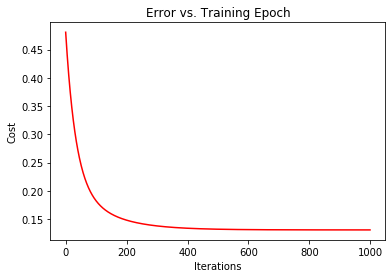

In [8]:
#plot the cost
fig, ax = plt.subplots()  
ax.plot(np.arange(iters), cost, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch')  